## Metody Obliczeniowe w Nauce i Technice
## Laboratorium 1
## Arytmetyka komputerowa
Paweł Pycia

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import time
from functools import partial
from itertools import product

In [96]:
def absolute_error(actual, measured):
    return abs(actual - measured)

def relative_error(actual, measured):
    return abs((actual - measured) / actual)

In [97]:
def time_function(function, arr):
    start_time = time.time()
    _sum = function(arr)
    stop_time = time.time()
    return stop_time - start_time

In [98]:
python_small = 0.53125
small = np.float32(python_small)
actual_value = python_small * (10 ** 7)
big_table = [small for _ in range(10 ** 7)]

In [99]:
def sum_naive(arr) -> np.float32:
    _sum = np.float32(0)
    for i in range(len(big_table)):
        _sum = _sum + arr[i]

    return _sum

In [100]:
naive_sum = sum_naive(big_table)

In [101]:
absolute_error_value = absolute_error(actual_value, naive_sum)
relative_error_value = relative_error(actual_value, naive_sum)
naive_time = time_function(sum_naive, big_table)
print(f"naive_sum:\t{naive_sum}\n"
      f"time:\t{naive_time}s\n"
      f"absolute error:\t {absolute_error_value}\n"
      f"relative error:\t {relative_error_value}")

naive_sum:	5030840.5
time:	1.052185297012329s
absolute error:	 281659.5
relative error:	 0.05301825882352941


Błąd względny jest duży, ponieważ do sumowania wykorzystujemy akumulator. Po kilkuset krokach pętli akumulator jest znacznie większy od wartości dodawanej, co powoduje utratę mniej znaczących bitów wartości dodawanej. Błąd kumulje się z każdym kolejnym krokiem.

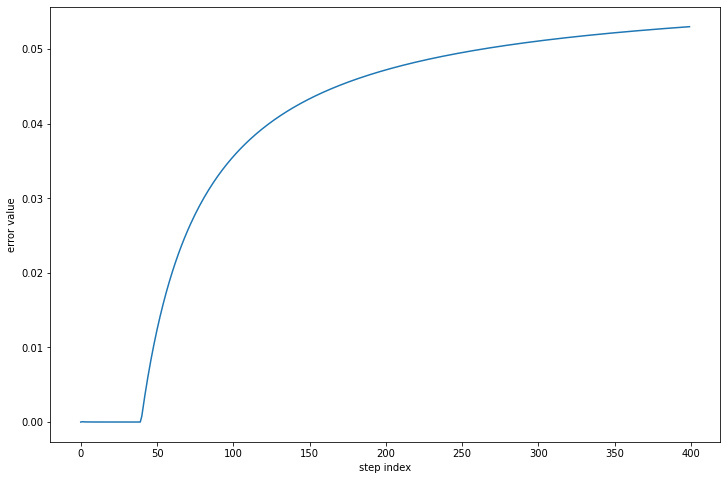

In [102]:
table_error = []
number = np.float32(0)
table_error.append(big_table[0] - small)
for i in range(len(big_table)):
    number = np.float32(number + big_table[i])
    if i % 25000 == 0 and i != 0:
        table_error.append(abs(np.float32(number) - np.float32(i*small))/np.float32(i*small))

plt.ylabel("error value")
plt.xlabel("step index")
plt.plot(table_error)

W przedziale od x = 0 do x ~ 45, błąd jest praktycznie zerowy, gdyż akumulator nie jest znacznie większy od wartości dodawej.
Gdy x >~ 45 krzywa przypomina wykres funkcji logarytmicznej. Początkowy przyros błędu jest bardzo duży, ale z czasem krzywa się wypłaszcza.

![title](img.png)

In [103]:
def sum_recursive(array) -> np.float32:
    n = len(array)
    if n == 2:
        return np.float32(array[0]) + np.float32(array[1])
    elif n == 1:
        return np.float32(array[0])
    else:
        return sum_recursive(array[:n//2]) + sum_recursive(array[n//2:])

In [104]:
recursive_sum = sum_recursive(big_table)

In [105]:
recursive_absolute_error = absolute_error(actual_value, recursive_sum)
recursive_relative_error = relative_error(actual_value, recursive_sum)
recursive_time = time_function(sum_recursive, big_table)
print(f"recursive sum:\t{recursive_sum}\n"
      f"time:\t{recursive_time}s\n"
      f"absolute error:\t{recursive_relative_error}\n"
      f"relative error:\t{recursive_relative_error}")

recursive sum:	5312500.0
time:	8.224005699157715s
absolute error:	0.0
relative error:	0.0


Błąd praktycznie zniknął, ponieważ rząd wielkości sumowanych liczb jest podobny

In [106]:
print(f"naive time:\t{naive_time}")
print(f"recursive time:\t{recursive_time}")
print(f"ratio: {recursive_time/naive_time}")

naive time:	1.052185297012329
recursive time:	8.224005699157715
ratio: 7.81611919735973


Algorytm rekurencyjne wykonuje się (~9) razy dłużej niż ten wykorzystujący pętlę for. Powodem jest charakterystyka działania rekursji, funkcja wywoływana jest wielkrotnie, a nie jest to przecież operacja "darmowa". Należy także zwrócić uwagę na to, że dla odpowiednio dużych tablic możemy przekroczyć maksymalną głębokość rekurencji.

In [107]:
def sum_khan(arr) -> np.float32:
    _sum = np.float32(0)
    err = np.float32(0)
    for i in range(len(arr)):
        y = np.float32(arr[i]) - err
        temp = _sum + y
        err = (temp - _sum) - y
        _sum = temp
    return _sum

In [108]:
khan_sum = sum_khan(big_table)

In [109]:
khan_absolute_error = absolute_error(actual_value, khan_sum)
khan_relative_error = relative_error(actual_value, khan_sum)
khan_time = time_function(sum_khan, big_table)
print(f"khan sum:\t{khan_sum}\n"
      f"time:\t{khan_time}s\n"
      f"absolute error:\t{khan_relative_error}\n"
      f"relative error:\t{khan_relative_error}")

khan sum:	5312500.0
time:	7.243626832962036s
absolute error:	0.0
relative error:	0.0


Zmienna err ma na celu oszacowanie błędu spowodowanego przez utratę mniej znaczących bitów i wprowadznie korekty do wyniku

In [110]:
print(f"recursive time:\t{recursive_time}")
print(f"kahan time:\t{khan_time}")
print(f"ratio: {khan_time/recursive_time}")

recursive time:	8.224005699157715
kahan time:	7.243626832962036
ratio: 0.8807905901261611


Jak widać czasy wykonania podejścia rekurencyjego oraz podejścia Kahana są bardzo podobne.

Algorytm Kahana ma jednak przewagę nad rekurencujnym, ponieważ:
    1. nie wygana dodatkowej pamięci do wywołań rekurencyjnych
    2. nie jest ograniczony maksymalną głębokością rekurencji

In [111]:
num = 0.53219432
nonzero_error_khan = sum_khan([num for _ in range(10**7)])
actual = 5321943.2
print(f"actual:\t{actual}\n"
      f"khan sum:\t{nonzero_error_khan}\n"
      f"absolute error:\t{relative_error(actual, nonzero_error_khan)}\n"
      f"relative error:\t{absolute_error(actual, nonzero_error_khan)}")

actual:	5321943.2
khan sum:	5321943.0
absolute error:	3.758025831359202e-08
relative error:	0.20000000018626451


In [112]:
def riemann(s: int, k: int, precision):
    return precision(1 /(k ** s))

def dirichlet(s: int, k: int, precision):
    return precision( ((-1) ** (k - 1)) * (1/ k ** s) )

In [113]:
def sum_forward(function, n: int, pre):
    _sum = pre(0.0)
    for i in range(1, n + 1):
        _sum = _sum + function(i, pre)
    return _sum

def sum_backward(function, n: int, pre):
    _sum = pre(0.0)
    for i in range(n, 0, -1):
        _sum = _sum + function(i, pre)
    return _sum

In [114]:
def prec_str(prec):
    return 'float64' if prec is np.float64 else 'float32'

In [115]:
s_arr = [2, 3.6667, 5, 7.2, 10]
n_arr = [50, 100, 200, 500, 1000]
precision = [np.float32, np.float64]
funcs = [riemann, dirichlet]

In [116]:
for s, n, f, prec in product(s_arr, n_arr, funcs, precision):
    print("Riemman" if f is riemann else "Dirichlet")
    print(f"sum forward:\t{sum_forward(partial(f, s), n, prec)},\t"
          f"s={s}, n={n}, precision={prec_str(prec)}")
    print(f"sum backward:\t{sum_backward(partial(f, s), n, prec)},\t"
          f"s={s}, n={n}, precision={prec_str(prec)}")


Riemman
sum forward:	1.6251329183578491,	s=2, n=50, precision=float32
sum backward:	1.62513267993927,	s=2, n=50, precision=float32
Riemman
sum forward:	1.625132733621529,	s=2, n=50, precision=float64
sum backward:	1.6251327336215293,	s=2, n=50, precision=float64
Dirichlet
sum forward:	0.8222709894180298,	s=2, n=50, precision=float32
sum backward:	0.8222710490226746,	s=2, n=50, precision=float32
Dirichlet
sum forward:	0.8222710318260295,	s=2, n=50, precision=float64
sum backward:	0.8222710318260289,	s=2, n=50, precision=float64
Riemman
sum forward:	1.634984016418457,	s=2, n=100, precision=float32
sum backward:	1.6349838972091675,	s=2, n=100, precision=float32
Riemman
sum forward:	1.6349839001848923,	s=2, n=100, precision=float64
sum backward:	1.634983900184893,	s=2, n=100, precision=float64
Dirichlet
sum forward:	0.8224174976348877,	s=2, n=100, precision=float32
sum backward:	0.8224174976348877,	s=2, n=100, precision=float32
Dirichlet
sum forward:	0.8224175333741286,	s=2, n=100, precisi

Obserwacje:
    1. float64 zachowuje precyję do ok 15 miejsc po przecinku, natomiast float32 do ok 7
    2. szereg definiujący funkcję Dirichleta jest szeregiem naprzemiennym, a wartości bezwględne kolejnych wyrazów są malejące. Biorąc to pod uwagę mniejszy błąd powinno generować sumowanie od tyłu.
    3. szereg definiujący funkcję dzeta Riemanna w rozważanych przez nas przypadkach jest malejący, zatem efektywniejsze powinno być sumowanie od tyłu, ponieważ zminimalizuje to różnicę wielkości między akumulatorem a kolejnymi wyrazami szeregu.

In [117]:
def logistic32(r, x) -> np.float32:
    return np.float32(r) * np.float32(x) * np.float32(1 - x)

def logistic64(r, x) -> float:
    return r * x * (1 - x)

print(type(logistic64(3,0.2)))

<class 'float'>


In [118]:
def diagram(x_0, iterations, r_start=1, r_stop=4):
    x_values = []
    r_values = []
    r_range = np.linspace(r_start, r_stop, 10000)

    for r in r_range:
        x = x_0
        for i in range(iterations + 100):
            if i >= 100:
                r_values.append(r)
                x_values.append(x)
            x = logistic32(np.float32(r), np.float32(x))

    plt.plot(r_values, x_values, marker='*', markersize=1, ls='')
    plt.xlabel("r")
    plt.ylabel("x")
    plt.show()

In [119]:
iterations = 250

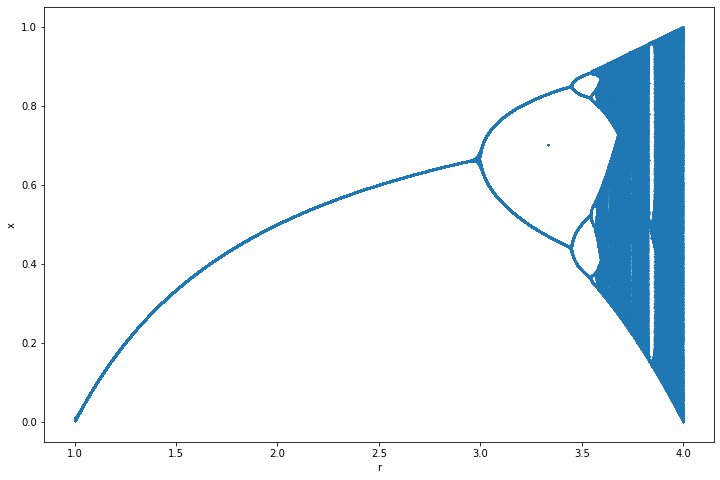

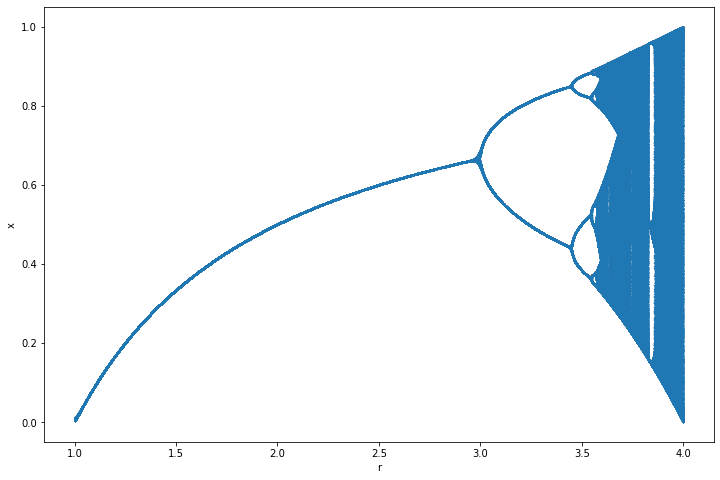

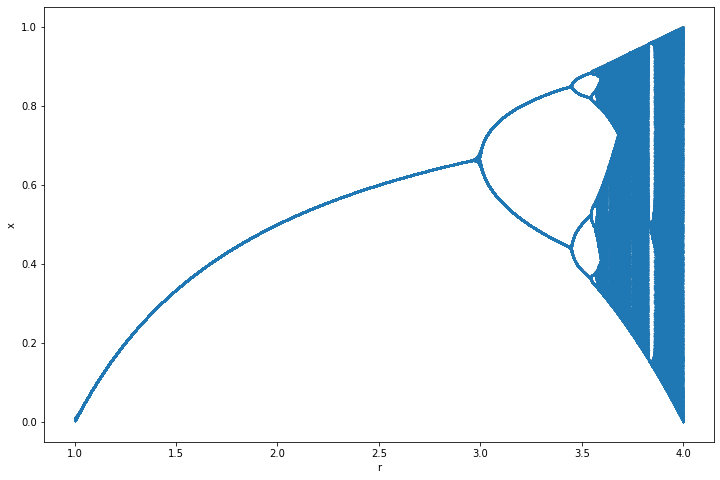

In [120]:
diagram(np.float32(0.1), iterations)
diagram(np.float32(0.25), iterations)
diagram(np.float32(0.61), iterations)

Obserserwacje:
    1. diagramy nie różnią się znacząco pomimo różnych wartości startowych
    2. dla r w przedzile (1, 3) diagram jest pojedynczą linią, a wraz ze wzrostem r rozgałęzia się wielokrotnie

In [121]:
def trajectories(_float, double, r):
    doubles = []
    floats = []

    for i in range(100):
        double = logistic64(r, double)
        _float = np.float32(logistic32(np.float32(r), np.float32(_float)))

        doubles.append(double)
        floats.append(_float)

    plt.rcParams['figure.figsize'] = [12, 8]
    plt.plot(range(100), doubles, label='double')
    plt.plot(range(100), floats, label='floats')
    plt.title('trajectories')
    plt.ylabel('x')
    plt.xlabel('iteration')
    plt.legend()
    plt.show()

r = 3.75


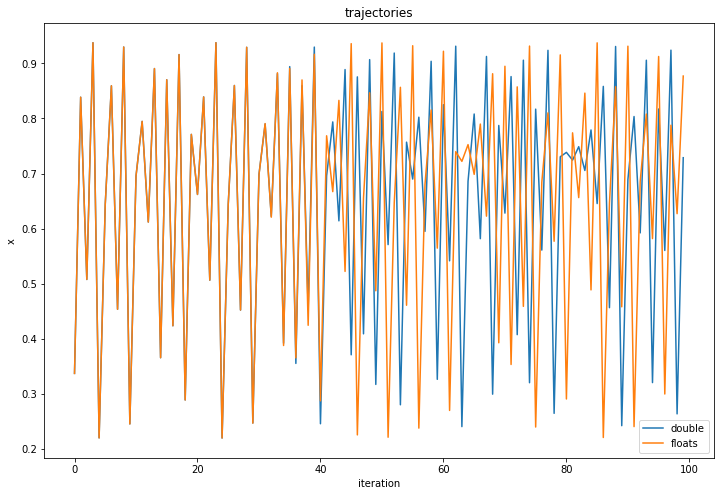

r = 3.76


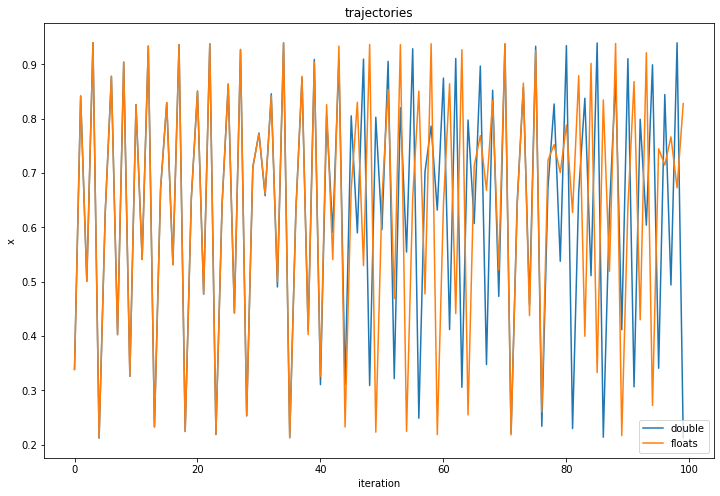

r = 3.77


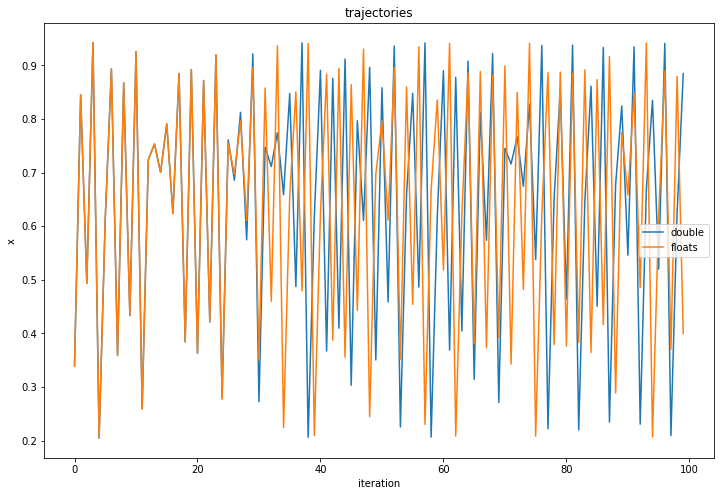

r = 3.78


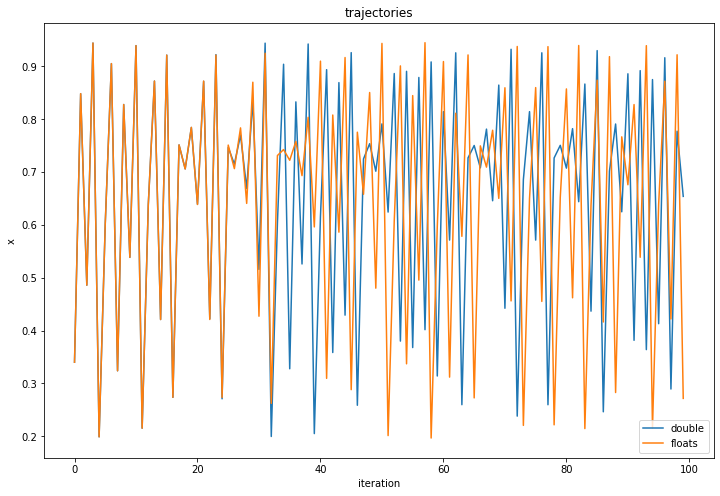

r = 3.79


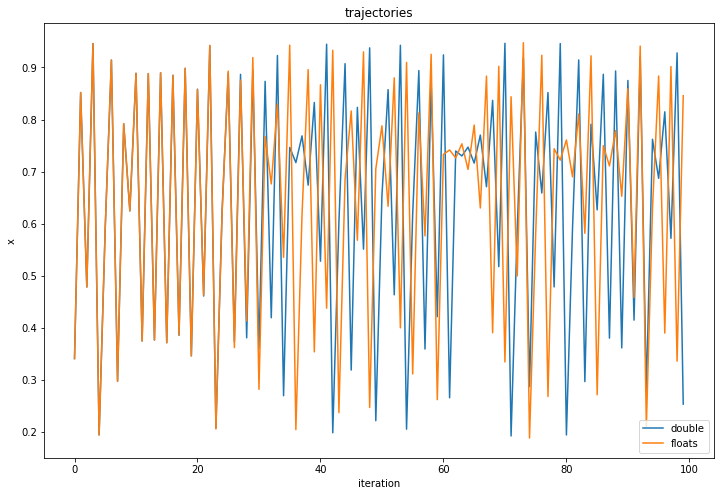

r = 3.8


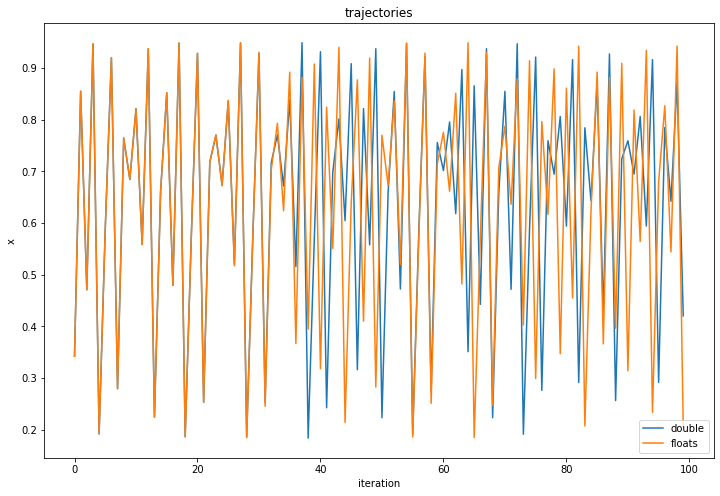

In [122]:
x_0 = .1
for r in range(375, 381):
    print(f"r = {r/100}")
    trajectories(np.float32(x_0), x_0, r/100)

Obserwacje:
    1. dla małej ilości iteracji (n ~< 30) trajektorie nie różnią się znacząco od siebie
    2. po przekroczeniu pewnej ilości iteracji trajektorie się rozbiegają.

Odwzorownie logityczne jest bardzo wrażliwe na zmiany parametrów (w naszym przypadku wynikające z kumulująch się wraz z kolejnymi krokami pętli błedów), co prowadzi do powstania dwóch różnych trajektorii.

In [123]:
def count_to_zero(x_0, treshold) -> int:
    x = np.float32(x_0)
    counter = 0
    while x > np.finfo(np.float32).eps and counter < treshold:
        x = logistic32(4, x)
        counter += 1
    return counter if counter < treshold else -1

In [124]:
x_0 = [0.001* i for i in range(1000)]
iters = [count_to_zero(x, 1e4) for x in x_0]

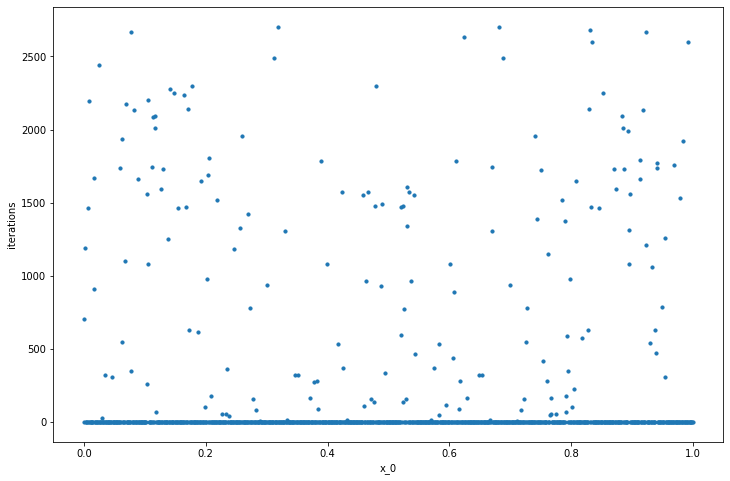

181 punktów zbiegło do 0 po mniej niż 10 000 iteracji


In [125]:
plt.scatter(x_0 , iters, s=10)
plt.ylabel('iterations')
plt.xlabel('x_0')
plt.show()
counter = 0
for v in iters:
    if v > 0: counter += 1

print(f"{counter} punktów zbiegło do 0 po mniej niż 10 000 iteracji")

(punkty ze wspórzędną y = 0 nie zbiegły)
Obserwacje:
    1. nie widać wyraźniej zależności między wartością początkową, a tempem zbiegania
    2. tylko około 1/5 puntów zbiegła do zera, przy ustalonym limicie iteracji